## Imports

In [192]:
!pip install loguru
!pip install impyute
!pip install missingpy
!pip install tqdm

     |████████████████████████████████| 76 kB 1.0 MB/s eta 0:00:011


In [193]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from loguru import logger
from tqdm import tqdm
%matplotlib inline

## **1. Main characteristics of features**

In [ ]:
col_names = [f'feature{i}' for i in range(1,6)]
df = pd.read_excel('data/data.xlsx', 
                   header=None,
                   names=col_names)

In [ ]:
df.head()

,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,NaN,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,NaN,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,NaN


In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  45 non-null     float64
 1   feature2  46 non-null     float64
 2   feature3  45 non-null     float64
 3   feature4  47 non-null     float64
 4   feature5  45 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [ ]:
df.describe()

,feature1,feature2,feature3,feature4,feature5
count,45.000000,46.000000,45.000000,47.000000,45.000000
mean,0.731691,-0.832829,0.867845,-0.768877,0.388719
std,1.151209,1.616996,1.053143,0.963373,1.347656
min,-1.815804,-4.122851,-1.379847,-2.729031,-2.626825
25%,-0.057839,-2.136559,0.163378,-1.555415,-0.304180
50%,0.991282,-0.587220,0.946280,-0.704662,0.222050
75%,1.621050,0.357034,1.435358,-0.045401,1.280085
max,3.184440,1.999813,4.266199,0.838120,3.467592


## **2. Data visualization**


### Probability Histogram

/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

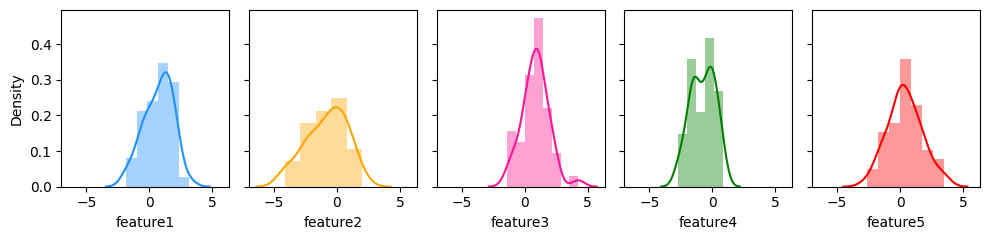

In [112]:
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['dodgerblue', 'orange', 'deeppink', 'green', 'red']

for feature, ax, color in zip(df, axes, colors):
    sns.distplot(df[feature], ax=ax, color=color) 

plt.tight_layout();

/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

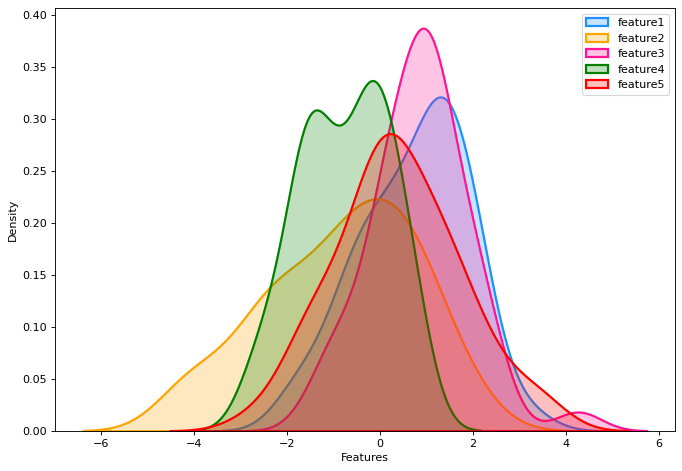

In [113]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'shade': True, 'linewidth':2})
colors = ['dodgerblue', 'orange', 'deeppink', 'green', 'red']
plt.figure(figsize=(10,7), dpi=80)
for feature, color in zip(df, colors):
    sns.distplot(df[feature], hist=False, color=color, label=feature, **kwargs)
plt.xlabel('Features')
plt.legend();

### Box plot

<AxesSubplot:>

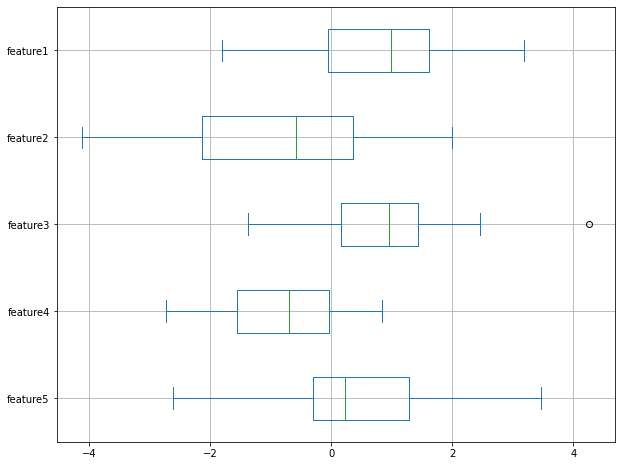

In [114]:
fig, ax = plt.subplots(figsize=(10, 8))
df[['feature5', 'feature4', 'feature3', 'feature2', 'feature1']].plot.box(vert=False, 
                                                                          grid=True, 
                                                                          ax=ax)

##  **3. Missing Values Analysis**

Usually missing data problems areclassified  into three categories. We'll try to categorize the missing values in our data.

![Missin Values Types](https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1)

In [115]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values Amount ', 1 : 'Percent of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Percent of Total Values', ascending=False).round(1)

    return mis_val_table_ren_columns

In [116]:
missing_values_table(df)

,Missing Values Amount,Percent of Total Values
feature1,5,10.0
feature3,5,10.0
feature5,5,10.0
feature2,4,8.0
feature4,3,6.0


#### Tools

! For better understanding of missing values patterns, we will use the [missingno](https://github.com/ResidentMario/missingno) library which allows us to get a quick visual summary of the completeness of our data.

#### Visualization location of the missing data

<AxesSubplot:>

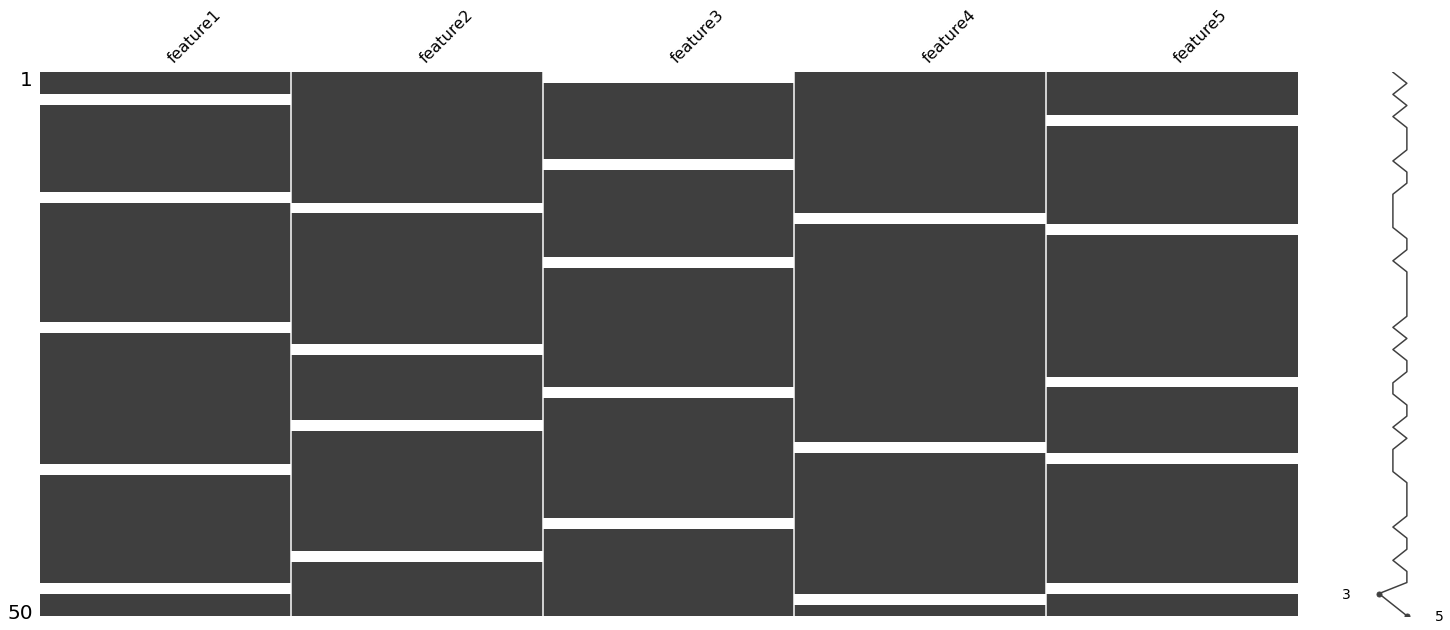

In [117]:
msno.matrix(df)

#### Correlation of features missingness. 
It represents how strongly the presence or absence of one variable affects the presence of another

<AxesSubplot:>

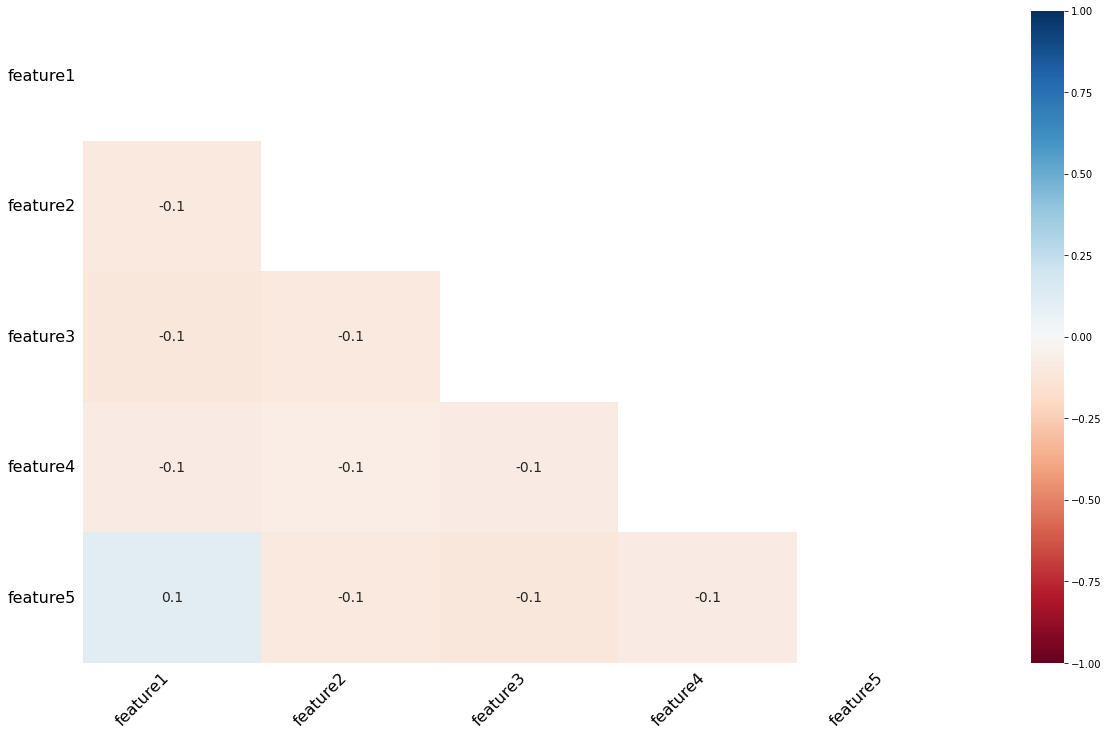

In [118]:
msno.heatmap(df)

The heatmap shows that there are no strong correlations between missing values of different features. The low correlations indicate that the data are Missing at Random (MAR).

#### Features Dendrogram (Hierarchy Clusterization)

The dendrogram allows you to  revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<AxesSubplot:>

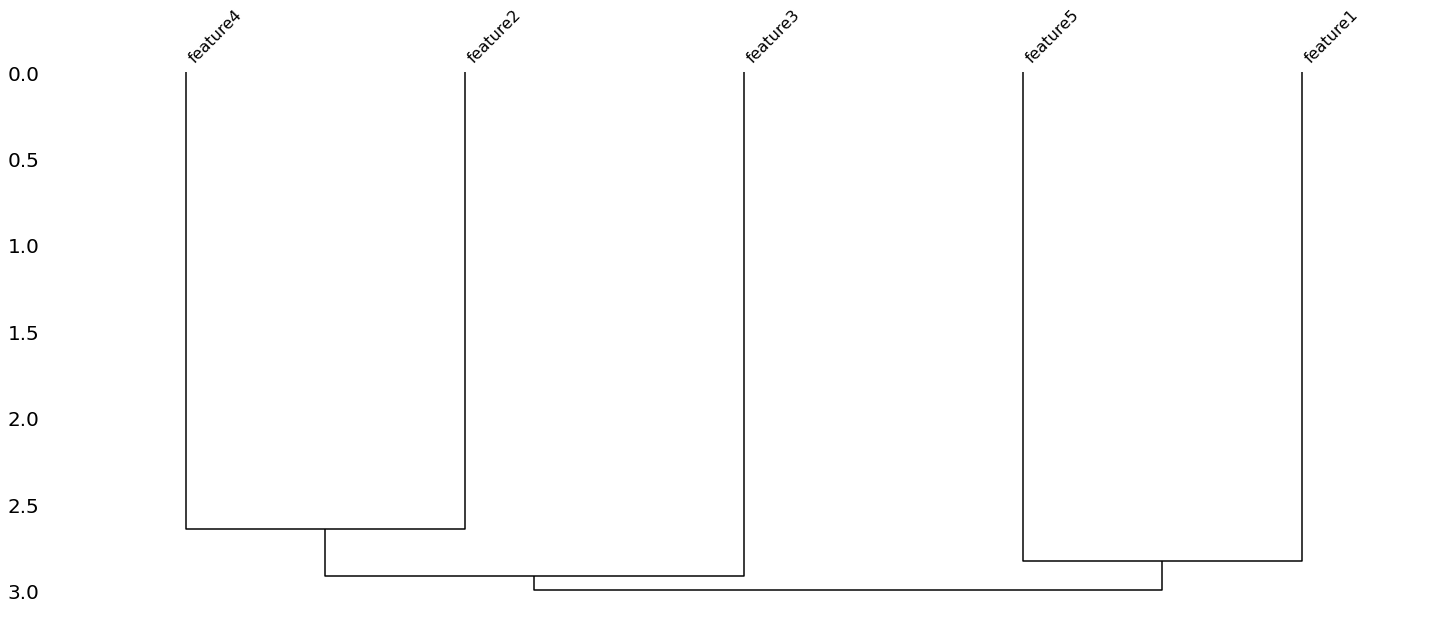

In [119]:
msno.dendrogram(df)

As the missingno documentaion states:
>Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they >might always both be filled or both empty, and so on(missingno documentation)

So the conclusion after these analysis charts is that there are no strong correlation between the missingness in features. First of all, due to small amount of missing values.

#### Feature Correlation heatmap

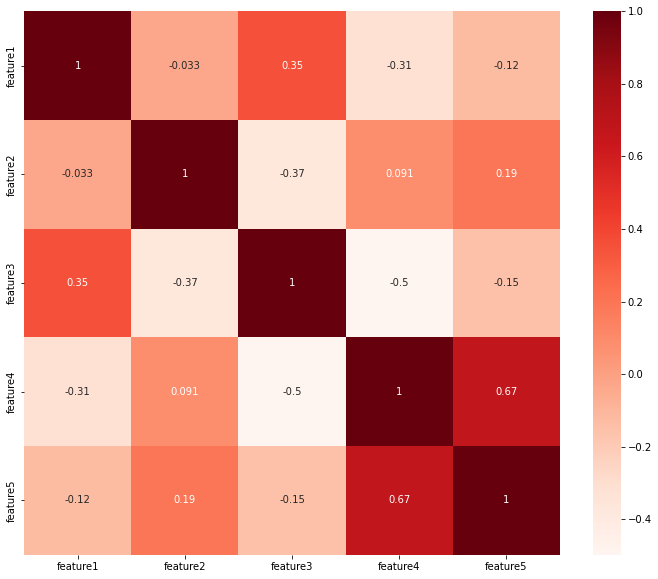

In [120]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

By the way, some features itself have strong enough correlation. For example:
- feature4 and feature5 have strong positive correlation with 0.67 value
- feature4 and feature3 in contrast have negative correlation with 0.5 value

##  **4. Imputation Methods**

There are a lot of missing data imputation scenarios. In this lab the following methods will be implemented:
1. Basic Data Imputatuion Techniques
    - With a constant value 
    - With a descriptive statistics (mean, median)
2. Advanced Data Imputatuion Techniques
    - EM Algorithm
    - KNN Imputater
    - MissForest Imputer

Check the data distribution

/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexander/HSE_Stuff/envs/data_analysis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

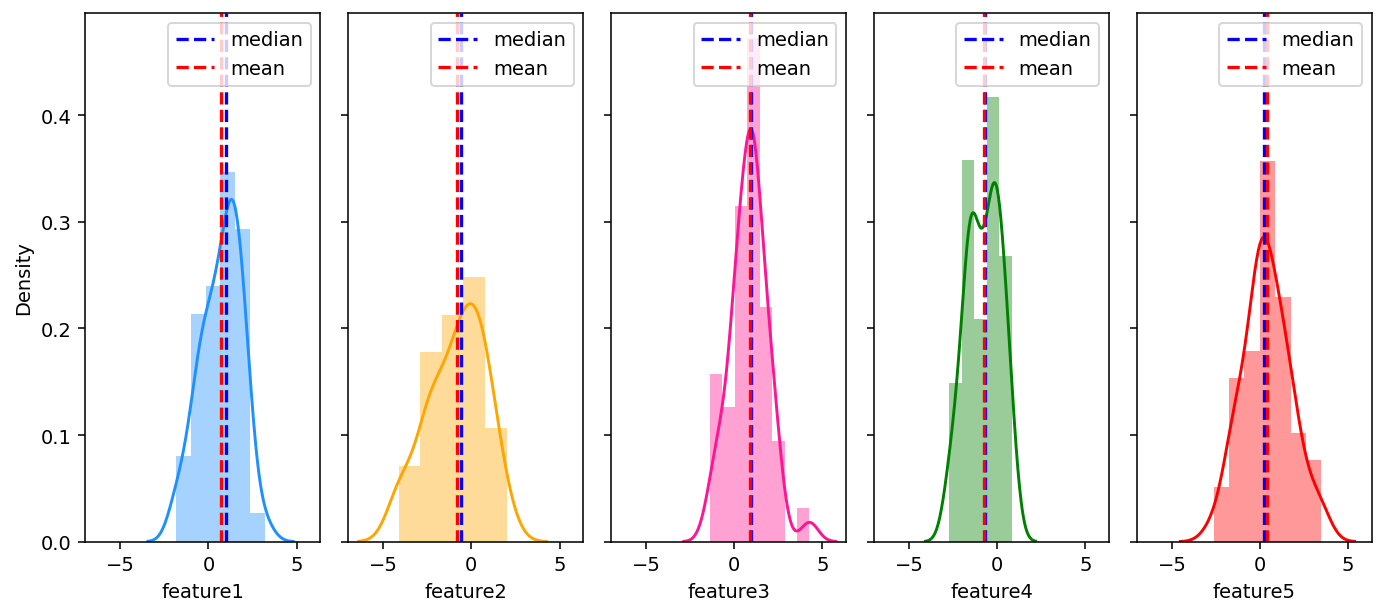

In [185]:
fig, axes = plt.subplots(1, 5, figsize=(10,4.5), dpi=140, sharex=True, sharey=True)
colors = ['dodgerblue', 'orange', 'deeppink', 'green', 'red']
for idx, (feature, ax, color) in enumerate(zip(df, axes, colors)):
    sns.distplot(df[feature], ax=ax, color=color) 
    axes[idx].axvline(x=df[feature].median(),
            color='blue',
            ls='--', 
            lw=1.7,
            label='median')

    axes[idx].axvline(x=df[feature].mean(),
                color='red',
                ls='--', 
                lw=1.7,
                label='mean')
    axes[idx].legend()
plt.tight_layout()

The data looks to be is not skewed. So, in case if data right or left skewed(long tail in some side) the mean imputation may be not the best choise.

## **5, 6.  Basic Data Imputatuion Techniques**

#### Random Constant Imputation

In [123]:
from sklearn.impute import SimpleImputer
import random
constant_fill_value = random.uniform(-10, 10)
logger.info(f"The data will be filled with {constant_fill_value}")
contant_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=constant_fill_value)

contant_imputer.fit(df)
filled_constant_np_data = contant_imputer.transform(df)

2021-09-26 11:53:10.337 | INFO     | __main__:<module>:4 - The data will be filled with -6.488916664705955


In [124]:
constant_filled_df = pd.DataFrame(data=filled_constant_np_data,columns=col_names)

In [125]:
constant_filled_df.head()

,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,-6.488917,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,-6.488917,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,-6.488917


#### Mean Imputation

In [126]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

mean_imputer.fit(df)
filled_mean_np_data = mean_imputer.transform(df)
mean_filled_df = pd.DataFrame(data=filled_mean_np_data,columns=col_names)

In [127]:
mean_filled_df.head()

,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,0.867845,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,0.731691,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,0.388719


#### Median Imputation

In [128]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

median_imputer.fit(df)
filled_median_np_data = median_imputer.transform(df)
median_filled_df = pd.DataFrame(data=filled_median_np_data,columns=col_names)

In [129]:
median_filled_df.head()

,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,0.946280,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,0.991282,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,0.222050


## **7. Advanced Data Imputatuion Techniques**

#### EM Imputation

In [131]:
import impyute as impy
em_data = impy.em(df.to_numpy())
em_filled_df= pd.DataFrame(data=em_data, columns = df.columns)
display(em_filled_df.head())

,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,0.019654,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,0.640381,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,-0.666768


#### KNN Imputation

Using this method the missing values will be replaced by the mean value of N nearest neighbors measured by Euclidean distance.

In [132]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_filled_df = pd.DataFrame(knn_imputer.fit_transform(df),columns = df.columns)
knn_filled_df.head()

,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,1.973483,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,1.413207,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,-0.709077


KNN Imputation 

Advantages:
- It's a great step from the simple average or median imputation

Disadvantages:
- Need to choice the K value 
- It is sensitive to outliers


#### MissForest Imputation(Random Forest imputation )

In [133]:
from missingpy import MissForest
random_forest_imputer = MissForest()
rf_filled_np = random_forest_imputer.fit_transform(df)
rf_filled_df = pd.DataFrame(rf_filled_np,columns = df.columns)
rf_filled_df.head()

Iteration: 0
Iteration: 1
Iteration: 2


,feature1,feature2,feature3,feature4,feature5
0,1.117915,-2.065559,2.240683,-1.362986,-0.709196
1,-0.503055,-2.892927,0.713895,-1.631237,-1.790220
2,1.172901,-0.077614,0.772394,-1.500325,-0.164499
3,1.163245,1.046673,1.674523,-1.867193,-0.534950
4,0.185329,-2.824514,2.036840,-2.040093,-1.496530


## **8. Outlier Detection**

### IQR - - Outlier Detection per column

In [217]:
filled_dfms = [constant_filled_df, mean_filled_df,median_filled_df, knn_filled_df, em_filled_df, rf_filled_df]
fill_types = ["Constant Value", "Mean", "Median", "KNN", "EM", "MissForrest"]

Q1 = rf_filled_df.quantile(0.25)
Q3 = rf_filled_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature1    1.457114
feature2    2.384214
feature3    1.240480
feature4    1.522593
feature5    1.710726
dtype: float64


### Isolation Forest - Outlier Detection per sample

Isolation is the keyword of this algorithm because it isolates anomalies from the rest of the observations. This isolation procedure separates all the data points by randomly splitting the region into smaller pieces.Isolation Forest **identifies anomalies as the observations with short average path lengths on the isolation trees**. There is a procedure applied for each isolation tree:
1. Randomly select two features.
2. Split the data points by randomly selecting a value between the minimum and the maximum of the selected features.

![](https://miro.medium.com/max/1400/1*d-4xINDQHv0G82o2GUApJQ.png)

In [135]:
# prepare ground truths
ground_truths = pd.isnull(df).any(1).to_numpy(dtype=int)

In [136]:
ground_truths

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0])

In [189]:
from sklearn.metrics import f1_score
def map_outliers_score_to_binary_labels(scores):
    '''Map Outliers Score of Isolation Forest algo into Classification Binary Labels.
    Parameters
    ----------
    outliers_scores: 1d array-like with outliers scores, where -1 indicate outlier, 1 normal data.
    Returns
    -------
    labels: 1d array-like with binary labels, 1 - outlier,0 - normal data
    
    '''
    labels = scores.copy()
    labels[labels == 1] = 0
    labels[labels == -1] = 1
    return labels

def get_outlier_detection_accuracy(ground_truths, outliers_scores, nan_fill_type="mean"):
    f1 = f1_score(ground_truths, map_outliers_score_to_binary_labels(outliers_scores))
    return f1

In [255]:
# Isolation Forrest objects learnig
outlier_detectors = {}
for fill_type, data in zip(fill_types, filled_dfms):
    iso = IsolationForest()
    iso.fit(data)
    outlier_detectors[fill_type] = iso
print(outlier_detectors)

{'Constant Value': IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False), 'Mean': IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False), 'Median': IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False), 'KNN': IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False), 'EM': IsolationForest(behaviour='depreca

In [256]:
from sklearn.decomposition import PCA
def draw_iso_forrest_outliers(list_data, outlier_indexes):
    fig, axes = plt.subplots(1, 5, figsize=(25,8.5), dpi=140, sharex=True, sharey=True)
    for idx, (data, (imputer, indexes), ax) in enumerate(zip(list_data,outlier_indexes.items(), axes)):
        pca = PCA(2)
        pca.fit(data)


        res=pd.DataFrame(pca.transform(data))

        Z = np.array(res)
        axes[idx].set_title(f"IsolationForest on {imputer} Imputer data")

        b1 = axes[idx].scatter(res[0], res[1], c='blue',
                         s=40,label="normal points")

        b1 = axes[idx].scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                         s=40,  edgecolor="red",label="predicted outliers")
        axes[idx].legend(loc="upper right")

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Outlier Detection F1 on data with Constant Value NaN Imputation is 0.8%
Outlier Detection F1 on data with Mean NaN Imputation is 0.278%
Outlier Detection F1 on data with Median NaN Imputation is 0.125%
Outlier Detection F1 on data with KNN NaN Imputation is 0.182%
Outlier Detection F1 on data with EM NaN Imputation is 0.125%
Outlier Detection F1 on data with MissForrest NaN Imputation is 0.343%


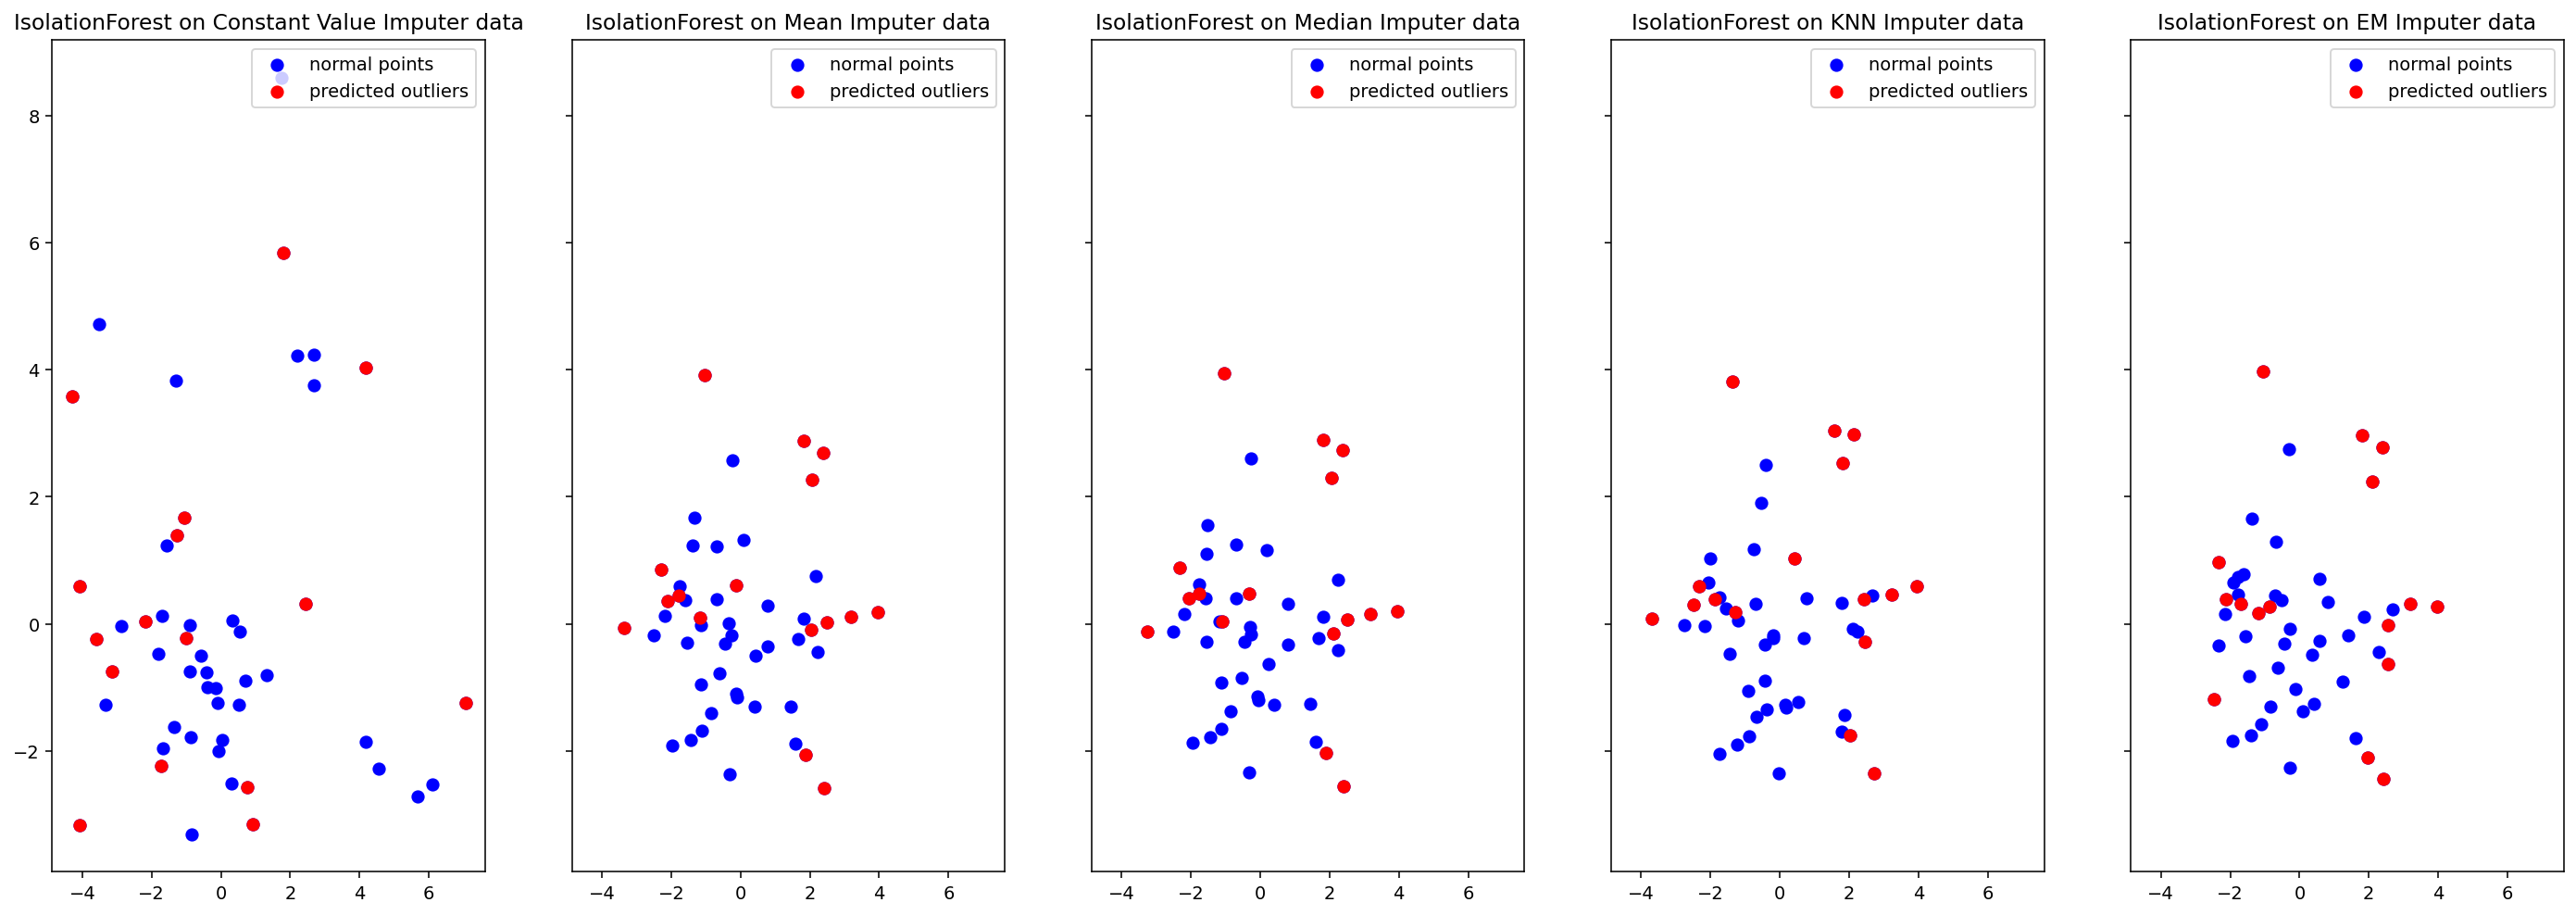

In [257]:
f1_scores = {imputer: [] for imputer in fill_types}
outlier_indexes = {imputer: [] for imputer in fill_types}
num_iteration = 1
for _ in tqdm(range(num_iteration)):
    for fill_type, data in zip(fill_types, filled_dfms):
        outliers_score_constant = outlier_detectors[fill_type].predict(data)
        # get outliers
        outliers=data.loc[outliers_score_constant==-1]
        outlier_indexes[fill_type] = list(outliers.index)
        f1_scores[fill_type] = get_outlier_detection_accuracy(ground_truths, outliers_score_constant, nan_fill_type=fill_type)
for imputer, f1 in f1_scores.items():
    print(f"Outlier Detection F1 on data with {imputer} NaN Imputation is {round(f1.mean(), 3)}%")

draw_iso_forrest_outliers(filled_dfms, outlier_indexes)

### DBSCAN

In [139]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [140]:
df_list = mean_filled_df.to_numpy()
dist = []
for row1 in df_list:
    for row2 in df_list:
        dist.append(np.linalg.norm(row1-row2))

np.median(dist)


3.3862282321799437

In [141]:
def cluster_outliers(data_df, eps=3.0, min_samples=3):
    db = DBSCAN(eps=eps, 
                min_samples=min_samples)
    db.fit(data_df)
    print(db.labels_)

    df_2d = TSNE(n_components=2).fit_transform(data_df)


    fig = plt.figure(figsize=(8, 8))
    plt.xlim(np.min(df_2d[:,0]-10),
            np.max(df_2d[:,0]+10))
    plt.ylim(np.min(df_2d[:,1]-10),
            np.max(df_2d[:,1]+10))

    sns.scatterplot(x=df_2d[:,0],
                    y=df_2d[:,1],
                    hue=db.labels_)
    return

[ 0  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0  0  0  0  0 -1  0  0  0
  0  0 -1  0  0]


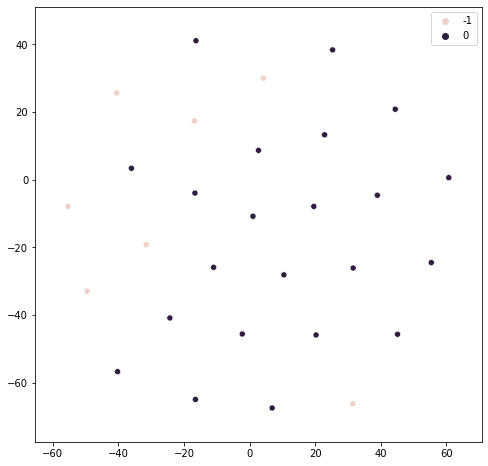

In [142]:
df_clear = df.dropna()
cluster_outliers(df_clear, 2.5, 4)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


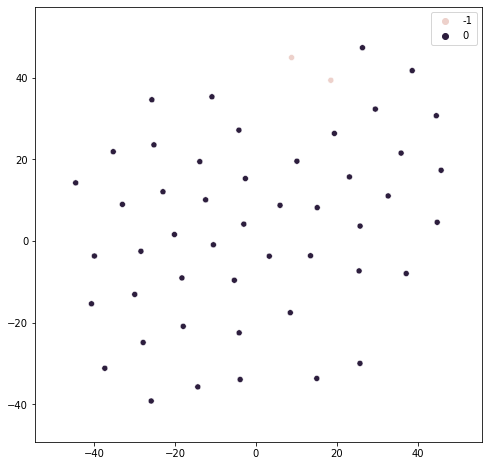

In [143]:
cluster_outliers(mean_filled_df, 2.5, 4)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


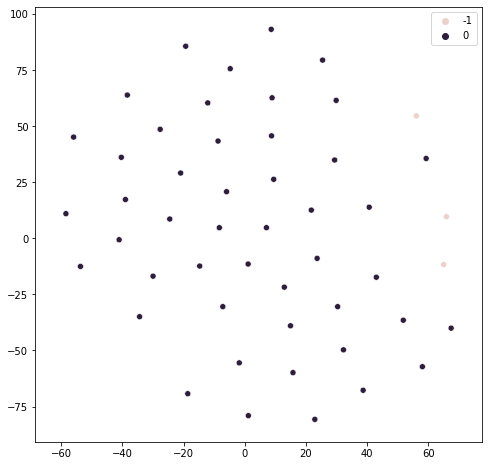

In [144]:
cluster_outliers(median_filled_df, 2.5, 4)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0
  0  0]


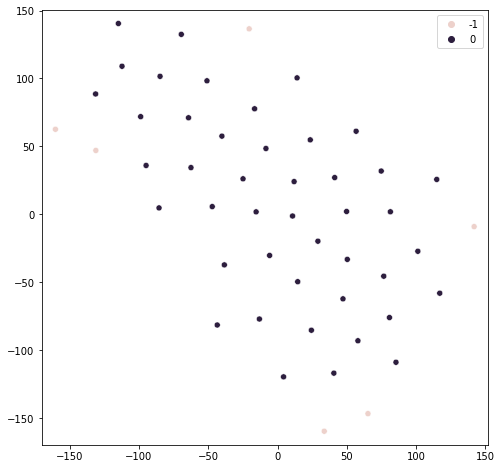

In [145]:
cluster_outliers(em_filled_df, 2.5, 4)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0]


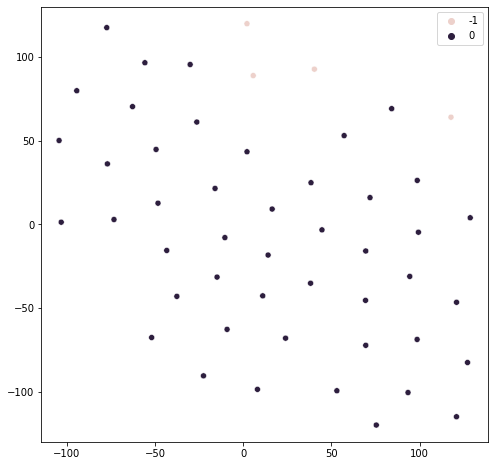

In [146]:
cluster_outliers(knn_filled_df, 2.5, 4)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0]


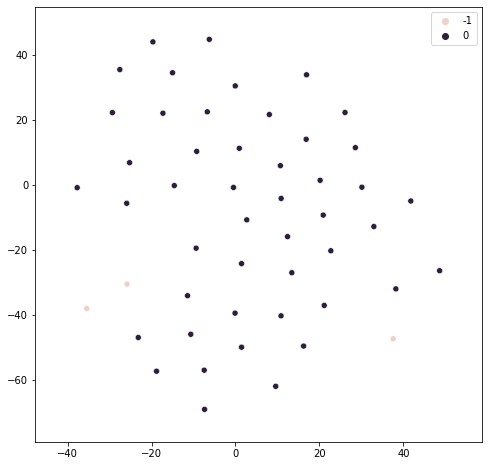

In [147]:
cluster_outliers(rf_filled_df, 2.5, 4)